<a href="https://colab.research.google.com/github/ishandahal/Fun_Projects/blob/master/Dog_cat_breed_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dog/ Cat Breed classifier
Building a dog breed classifier given an image.
Packages used fastai and pytorch.

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *

###Dowloading the dataset of 10 dog breeds.

In [ ]:
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
file = get_image_files(path/'images')
len(file)

7390

##Labeling
Getting the labels from the files and attaching them to appropriate categories

In [ ]:
##Cat breeds have upper case names and dog breeds have lower
def label_func(f):
    return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, file, label_func, item_tfms=Resize(224))

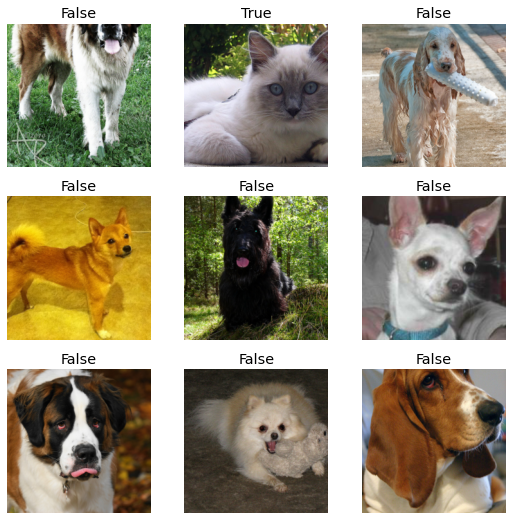

In [ ]:
dls.show_batch()

###Using a ResNet34 pretrained architecture
Fine tune parameters for 1 epoch

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.149143,0.021954,0.008796,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.057099,0.021392,0.007442,00:53


###Using regular expression to name breeds from the file names

In [ ]:
pat = r'^(.*)_\d+.jpg'

In [ ]:
dls = ImageDataLoaders.from_name_re(path, file, pat, item_tfms=Resize(224))

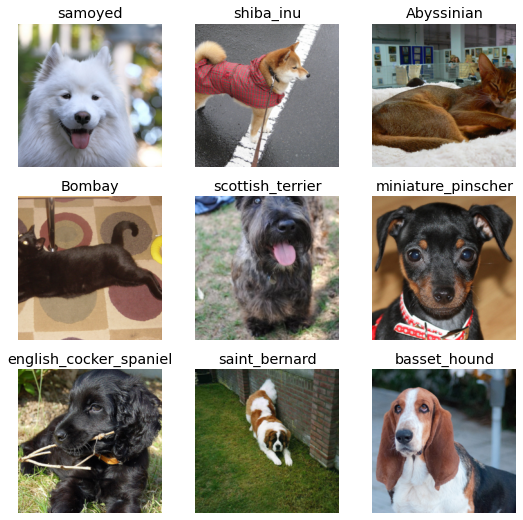

In [ ]:
dls.show_batch()

###Using data augmentation since this is a harder classification problem of several classes.

In [ ]:
## Adding data augmentation.
dls = ImageDataLoaders.from_name_re(path, file, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

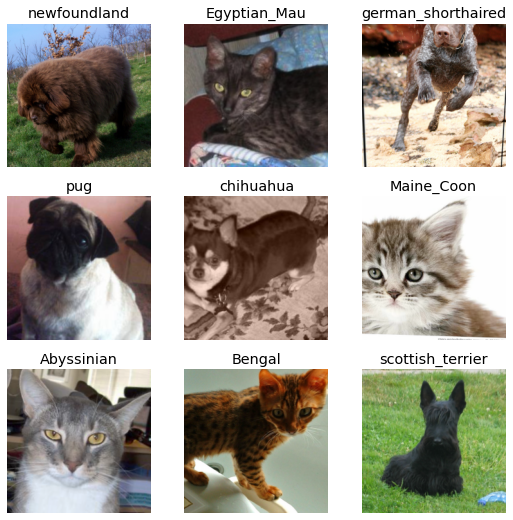

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

###Using the learning rate finder to find the optimal learning rate to choose.

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.002511886414140463)

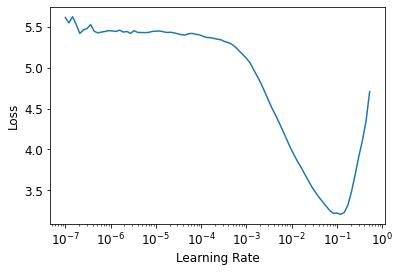

In [ ]:
learn.lr_find()

###Final training run for 4 epochs

In [ ]:
learn.fine_tune(4, 2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.536116,0.283791,0.094046,01:05


epoch,train_loss,valid_loss,error_rate,time
0,0.476690,0.245711,0.085927,01:10
1,0.414394,0.249806,0.070365,01:11
2,0.250426,0.171607,0.051421,01:10
3,0.155621,0.158610,0.047361,01:11


###Final error rate is ~5% which is not bad.

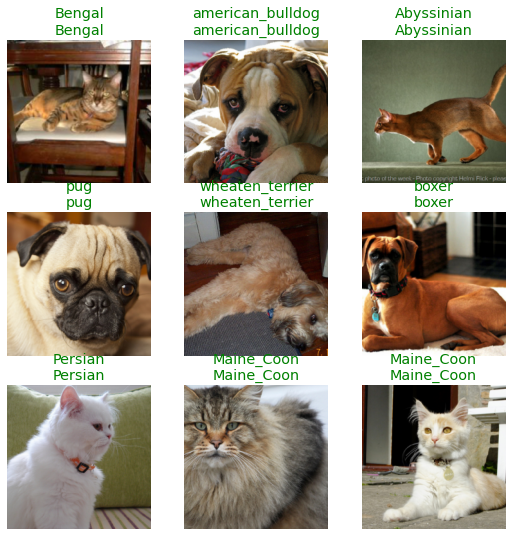

In [ ]:
learn.show_results()

###Checking to see what the models got wrong

In [ ]:
interp = Interpretation.from_learner(learn)

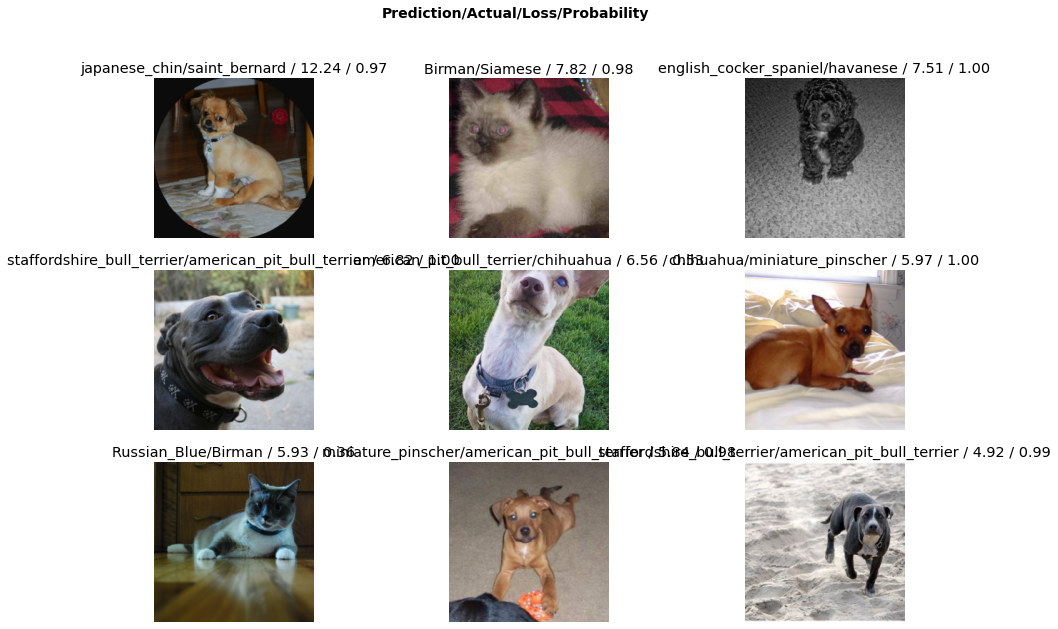

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))